# Covid-19 (Coronavirus) Analytics and Forecasting

Note - All data was gathered and prepared on the [Covid19_Data_ETL.ipynb](https://github.com/BrianLeip/CoronaVirus/blob/master/Covid19_Data_ETL.ipynb) notebook prior to loading into this notebook, following standard best practices for data analytics.

## Data Sources

### Primary Data Source: Johns Hopkins CSSE Data Repository 
- Link: https://github.com/CSSEGISandData/COVID-19  
- **Live data:**
    - Countries (cases, deaths, recoveries, active)
    - US States (cases, deaths)
    - US County (cases, deaths)
- **Historic time series data:**
    - Countries (cases, deaths, recoveries, active)
    - US States (cases, deaths)
    - US Counties (cases, deaths)

### US State Testing and Hospitalizations: Covid Tracking Project 
- Link: https://covidtracking.com/data/ 
- **Live data:**
    - US State testing and hospitalization, ICU stats
- **Historic time series data:**
    - US State testing and hospitalization, ICU stats

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from datetime import datetime
import os
import seaborn as sns

In [2]:
sns.set()
sns.set_style("whitegrid")
sns.set_palette("Paired")
#sns.palplot(sns.color_palette("Paired", n_colors=15))

## Load the Data
See the Covid19_Data_ETL notebook for info on the data gathering and wrangling process.  
All original data left unchanged, only the format was changed to make it preferable to work with for EDA and Data Viz

### Dataset 1: John Hopkins

In [3]:
jh_live_global = pd.read_csv('Datasets/JH/orig/jh_live_global_orig.csv')

In [4]:
jh_live_countries = pd.read_csv('Datasets/JH/jh_live_countries.csv', index_col=0)

In [5]:
jh_live_usstates = pd.read_csv('Datasets/JH/jh_live_usstates.csv', index_col=0)

In [6]:
jh_live_uscounties = pd.read_csv('Datasets/JH/jh_live_uscounties.csv', index_col=[0,1])

In [7]:
jh_hist_countries_cases = pd.read_csv('Datasets/JH/jh_hist_countries_cases.csv', index_col=0, parse_dates=True)

In [8]:
jh_hist_countries_cases_pct = pd.read_csv('Datasets/JH/jh_hist_countries_cases_pct.csv', index_col=0, parse_dates=True)

In [9]:
jh_hist_countries_cases_pct_ewma = pd.read_csv('Datasets/JH/jh_hist_countries_cases_pct_ewma.csv', index_col=0, parse_dates=True)

In [10]:
jh_hist_countries_deaths = pd.read_csv('Datasets/JH/jh_hist_countries_deaths.csv', index_col=0, parse_dates=True)

In [11]:
jh_hist_countries_deaths_pct = pd.read_csv('Datasets/JH/jh_hist_countries_deaths_pct.csv', index_col=0, parse_dates=True)

In [12]:
jh_hist_countries_deaths_pct_ewma = pd.read_csv('Datasets/JH/jh_hist_countries_deaths_pct_ewma.csv', index_col=0, parse_dates=True)

In [13]:
jh_hist_countries_recovered = pd.read_csv('Datasets/JH/jh_hist_countries_recovered.csv', index_col=0, parse_dates=True)

In [14]:
jh_hist_countries_recovered_pct = pd.read_csv('Datasets/JH/jh_hist_countries_recovered_pct.csv', index_col=0, parse_dates=True)

In [15]:
jh_hist_countries_recovered_pct_ewma = pd.read_csv('Datasets/JH/jh_hist_countries_recovered_pct_ewma.csv', index_col=0, parse_dates=True)

In [16]:
jh_hist_usstates_cases = pd.read_csv('Datasets/JH/jh_hist_usstates_cases.csv', index_col=0, parse_dates=True)

In [17]:
jh_hist_usstates_cases_pct = pd.read_csv('Datasets/JH/jh_hist_usstates_cases_pct.csv', index_col=0, parse_dates=True)

In [18]:
jh_hist_usstates_cases_pct_ewma = pd.read_csv('Datasets/JH/jh_hist_usstates_cases_pct_ewma.csv', index_col=0, parse_dates=True)

In [19]:
jh_hist_usstates_deaths = pd.read_csv('Datasets/JH/jh_hist_usstates_deaths.csv', index_col=0, parse_dates=True)

In [20]:
jh_hist_usstates_deaths_pct = pd.read_csv('Datasets/JH/jh_hist_usstates_deaths_pct.csv', index_col=0, parse_dates=True)

In [21]:
jh_hist_usstates_deaths_pct_ewma = pd.read_csv('Datasets/JH/jh_hist_usstates_deaths_pct_ewma.csv', index_col=0, parse_dates=True)

In [22]:
jh_hist_uscounties_cases = pd.read_csv('Datasets/JH/jh_hist_uscounties_cases.csv', index_col=0, header=[0,1], parse_dates=True)

In [23]:
jh_hist_uscounties_cases_pct = pd.read_csv('Datasets/JH/jh_hist_uscounties_cases_pct.csv', index_col=0, header=[0,1], parse_dates=True)

In [24]:
jh_hist_uscounties_cases_pct_ewma = pd.read_csv('Datasets/JH/jh_hist_uscounties_cases_pct_ewma.csv', index_col=0, header=[0,1], parse_dates=True)

In [25]:
jh_hist_uscounties_deaths = pd.read_csv('Datasets/JH/jh_hist_uscounties_deaths.csv', index_col=0, header=[0,1], parse_dates=True)

In [26]:
jh_hist_uscounties_deaths_pct = pd.read_csv('Datasets/JH/jh_hist_uscounties_deaths_pct.csv', index_col=0, header=[0,1], parse_dates=True)

In [27]:
jh_hist_uscounties_deaths_pct_ewma = pd.read_csv('Datasets/JH/jh_hist_uscounties_deaths_pct_ewma.csv', index_col=0, header=[0,1], parse_dates=True)

### Dataset 2: Covid Tracking Project

PENDING

## Prep Some Commonly Used Data (e.g. current date for each dataset)

In [28]:
jh_live_date = jh_live_global['Last_Update'][7] # The 0th item is not updated (Diamond princess) so grab one that is updated instead.
jh_live_date = pd.to_datetime(jh_live_date)
jh_live_date = pd.Timestamp(jh_live_date.year, jh_live_date.month, jh_live_date.day)
jh_live_date

Timestamp('2021-08-22 00:00:00')

In [29]:
jh_hist_date = jh_hist_countries_cases.index[-1]
jh_hist_date

Timestamp('2021-08-21 00:00:00')

In [30]:
# Date to zoom in on for charting recent data
zoom_date1 = '3/15/2020'
zoom_date2 = '4/1/2020'
zoom_date3 = '4/15/2020'
zoom_date4 = '5/1/2020'
zoom_date5 = '5/15/2020'
zoom_date6 = '6/1/2020'
zoom_date7 = '6/15/2020'
zoom_date8 = '7/1/2020'

## Exploratory Data Analysis (EDA)

### Global and Country Level

In [31]:
# Total Global confirmed cases, deaths, recovered, and active (live)
pd.DataFrame(jh_live_countries[['Confirmed', 'Deaths', 'Recovered', 'Active']].sum() )

,0
Confirmed,211364677.0
Deaths,4423507.0
Recovered,0.0
Active,206941170.0


In [32]:
# Top countries by confirmed count as of latest date
top_20_countries = jh_live_countries.nlargest(20, 'Confirmed')
top_10_countries = jh_live_countries.nlargest(10, 'Confirmed')
top_10_countries.head()

,Confirmed,Deaths,Recovered,Active,Last_Update,Lat,Long
Country_Region,,,,,,,
US,37673118,628303,0.0,37044815.0,2021-08-22 04:21:29,37.950547,-91.419547
India,32393286,433964,0.0,31959322.0,2021-08-22 04:21:29,23.088275,81.806127
Brazil,20556487,574209,0.0,19982278.0,2021-08-22 04:21:29,-12.669522,-48.480493
France,6682952,113472,0.0,6569480.0,2021-08-22 04:21:29,6.430808,-34.730285
Russia,6633521,172257,0.0,6461264.0,2021-08-22 04:21:29,54.546312,62.120860


<AxesSubplot:title={'center':'Top 10 Countries - Confirmed Cases Over Time'}>

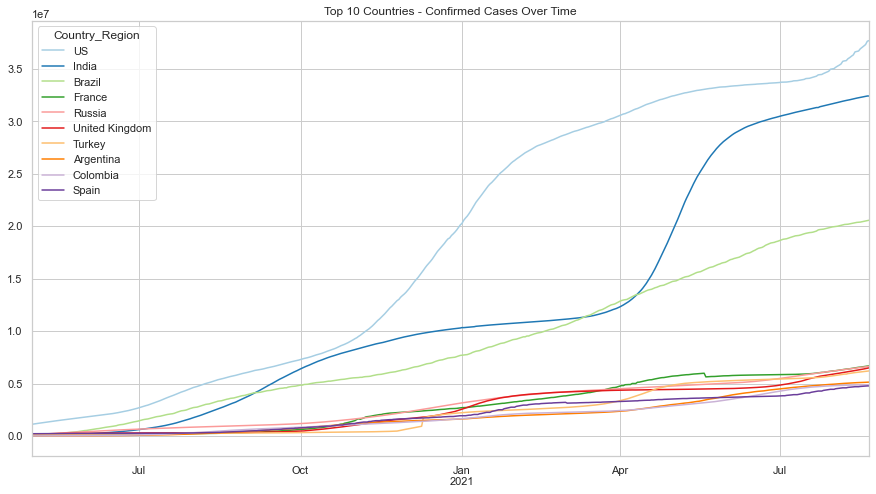

In [33]:
# Plot the top 10 countries confirmed infections over time
jh_hist_countries_cases[top_10_countries.index].loc[zoom_date4:, top_10_countries.index].plot(figsize=(15,8), title="Top 10 Countries - Confirmed Cases Over Time")

<AxesSubplot:title={'center':'Top 10 Countries ex US - Confirmed Cases Over Time'}>

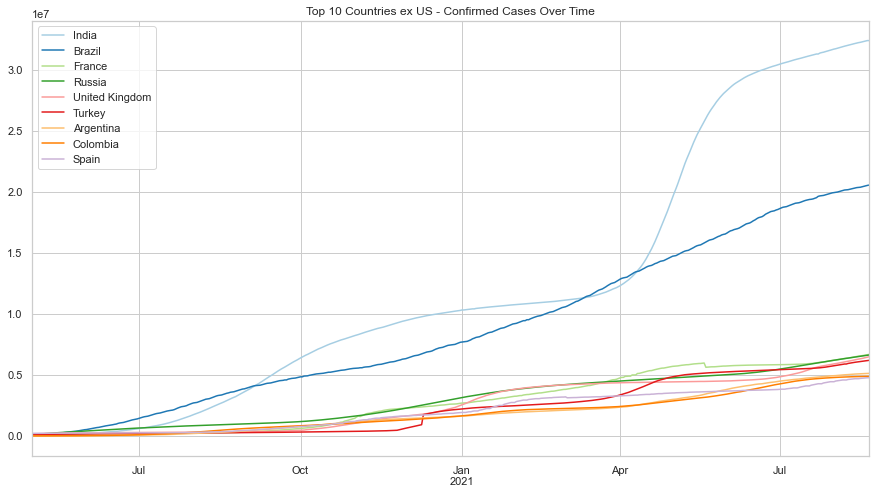

In [34]:
# Same chart but excluding US
jh_hist_countries_cases[top_10_countries.index].loc[zoom_date4:, top_10_countries.index != 'US'].plot(figsize=(15,8), title="Top 10 Countries ex US - Confirmed Cases Over Time")

### US State Level

In [35]:
# Top US States by confirmed cases
top_20_states = jh_live_usstates.nlargest(20, 'Confirmed')
top_10_states = jh_live_usstates.nlargest(10, 'Confirmed')
top_10_states

,Confirmed,Deaths,Recovered,Active,Last_Update,Lat,Long
Province_State,,,,,,,
California,4227429,65097,0.0,4162332.0,2021-08-22 04:21:29,37.843962,-120.728594
Texas,3459060,55226,0.0,3403834.0,2021-08-22 04:21:29,31.660643,-98.653069
Florida,3071489,42252,0.0,3029237.0,2021-08-22 04:21:29,28.940755,-82.700744
New York,2233083,54012,0.0,2179071.0,2021-08-22 04:21:29,42.544151,-75.474183
Illinois,1482369,26150,0.0,1456219.0,2021-08-22 04:21:29,39.843618,-89.178330
Georgia,1307084,22199,0.0,1284885.0,2021-08-22 04:21:29,32.808532,-83.577430
Pennsylvania,1269919,28074,0.0,1241845.0,2021-08-22 04:21:29,40.818078,-77.615318
Ohio,1178792,20689,0.0,1158103.0,2021-08-22 04:21:29,40.310670,-82.835408
North Carolina,1144894,14059,0.0,1130835.0,2021-08-22 04:21:29,35.624210,-79.501099


<AxesSubplot:title={'center':'Confirmed Cases - Top 10 US States'}>

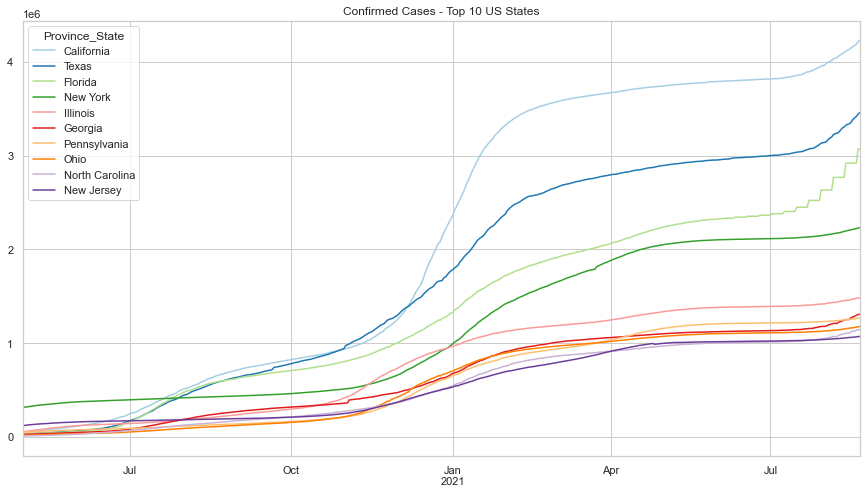

In [36]:
# Chart the top states with confirmed positive
jh_hist_usstates_cases.loc[zoom_date4:, top_10_states.index].plot(title='Confirmed Cases - Top 10 US States', figsize=(15,8))

<AxesSubplot:title={'center':'Deaths - Top US States'}>

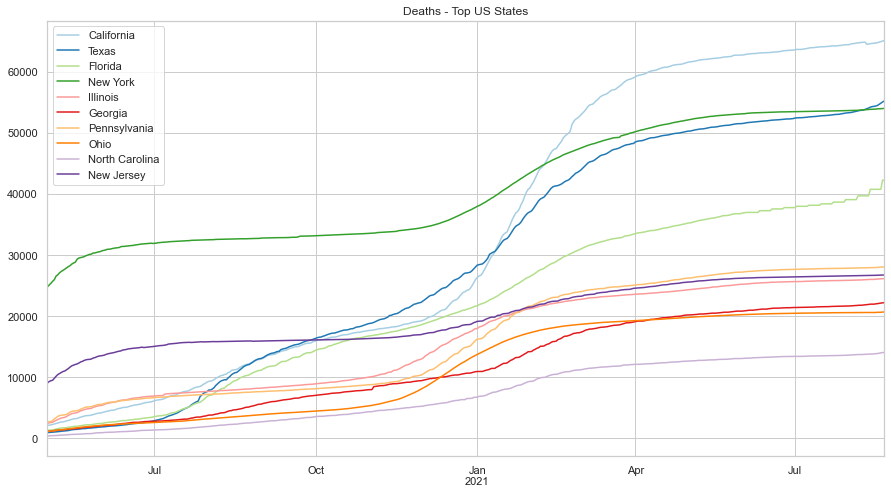

In [37]:
# Chart the top states of by # of deaths
jh_hist_usstates_deaths[top_10_states.index].loc[zoom_date4:, :].plot(title='Deaths - Top US States', figsize=(15,8))

<AxesSubplot:title={'center':'Deaths - Top US States (ex NY)'}>

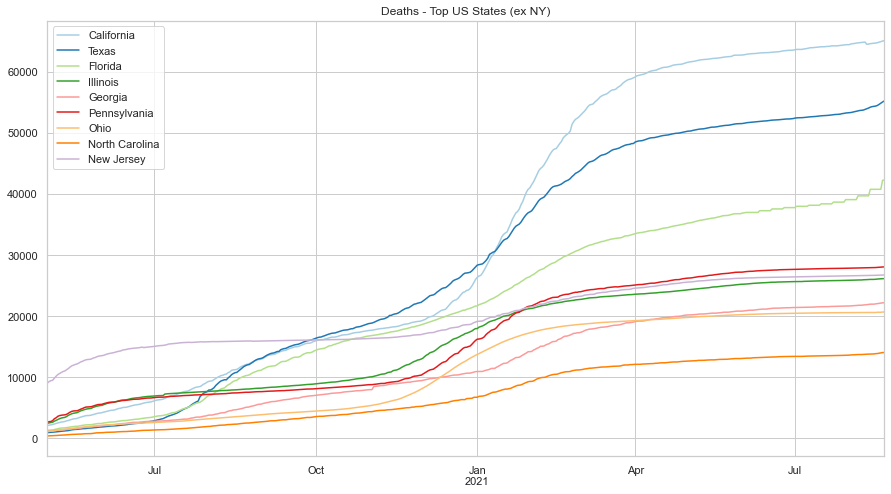

In [38]:
# The same chart but this time without NY to zoom in on the others
jh_hist_usstates_deaths[top_10_states.index].loc[zoom_date4:, top_10_states.index != 'New York'].plot(title='Deaths - Top US States (ex NY)', figsize=(15,8))

### US County Level

In [39]:
# TODO: CHANGE US COUNTY SECTION TO TOP COUNTIES WITHIN THE CURRENT TOP XX STATES
# ALSO ADD A HEATMAP OF US COUNTIES

In [40]:
top_counties_CA = jh_live_uscounties.loc['California'].nlargest(15, 'Confirmed')
top_counties_CA.head(7)

,Confirmed,Deaths,Recovered,Active,Last_Update,Lat,Long,FIPS
Admin2,,,,,,,,
Los Angeles,1380415,25061,0.0,1355354.0,2021-08-22 04:21:29,34.308284,-118.228241,6037.0
Riverside,325944,4697,0.0,321247.0,2021-08-22 04:21:29,33.743150,-115.993358,6065.0
San Diego,322620,3848,0.0,318772.0,2021-08-22 04:21:29,33.034846,-116.736533,6073.0
San Bernardino,322112,5322,0.0,316790.0,2021-08-22 04:21:29,34.840603,-116.177469,6071.0
Orange,298667,5179,0.0,293488.0,2021-08-22 04:21:29,33.701475,-117.764600,6059.0
Santa Clara,130007,1774,0.0,128233.0,2021-08-22 04:21:29,37.231049,-121.697046,6085.0
Sacramento,127226,1843,0.0,125383.0,2021-08-22 04:21:29,38.451068,-121.342537,6067.0


<AxesSubplot:title={'center':'Confirmed Cases - Top CA Counties'}>

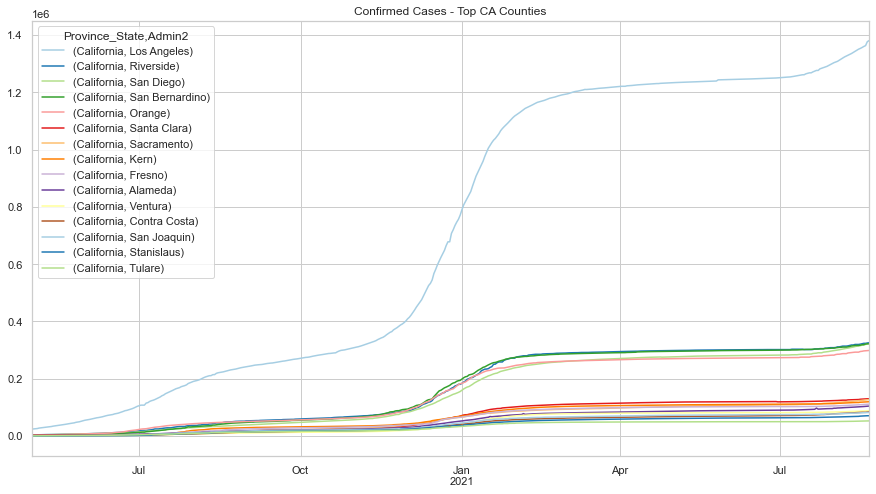

In [41]:
# Chart the CA Counties confirmed cases over time
top_counties_CA_filter = jh_hist_uscounties_cases.loc[jh_hist_date, ('California')].nlargest(15).index
top_counties_CA_cases = jh_hist_uscounties_cases.loc[zoom_date4:, ('California', top_counties_CA_filter)].sort_values(axis=1, by=jh_hist_date, ascending=False)
top_counties_CA_cases.plot(title='Confirmed Cases - Top CA Counties', figsize=(15,8))

<AxesSubplot:title={'center':'Confirmed Cases - Top CA Counties (excl Los Angeles)'}>

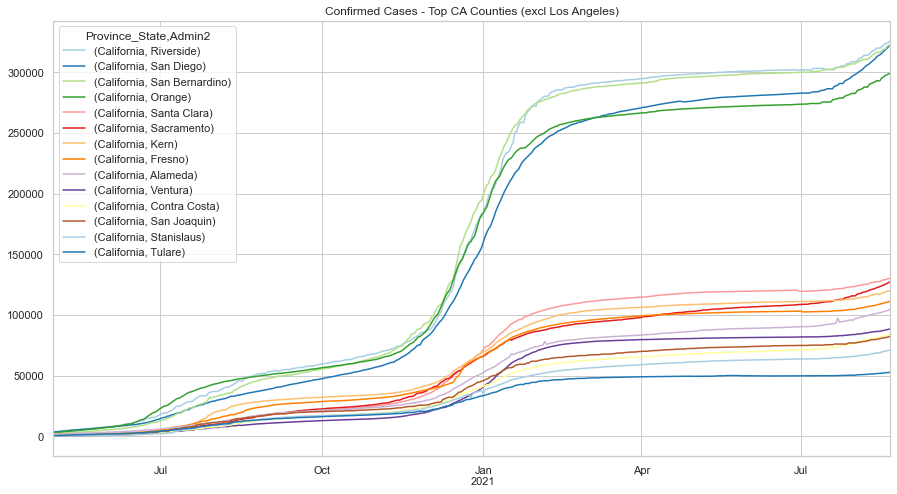

In [42]:
# Same chart but excluding Los Angeles to zoom in on the others
top_counties_CAexLA_cases = top_counties_CA_cases.loc[zoom_date4:, ('California', top_counties_CA_filter != 'Los Angeles')]
top_counties_CAexLA_cases.plot(title='Confirmed Cases - Top CA Counties (excl Los Angeles)', figsize=(15,8))

<AxesSubplot:title={'center':'Deaths - Top CA Counties'}>

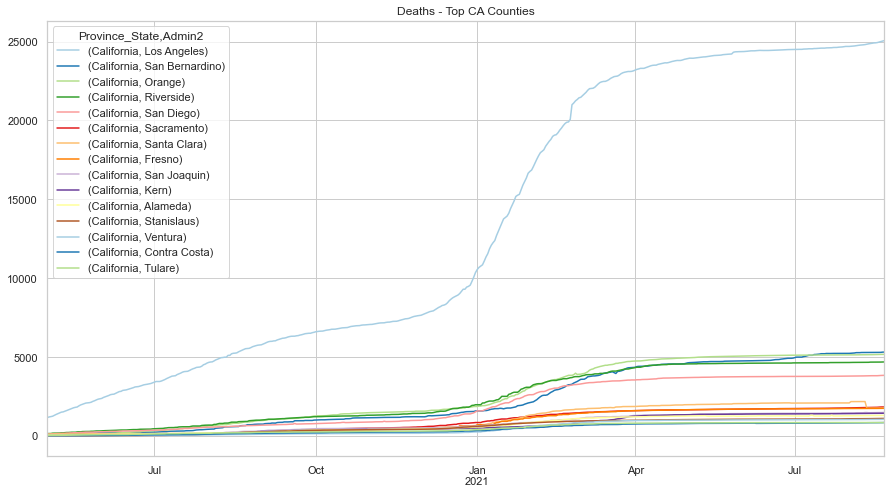

In [43]:
# Chart the CA Counties deaths over time
top_counties_CA_filter = jh_hist_uscounties_deaths.loc[jh_hist_date, ('California')].nlargest(15).index
top_counties_CA_deaths = jh_hist_uscounties_deaths.loc[zoom_date4:, ('California', top_counties_CA_filter)].sort_values(axis=1, by=jh_hist_date, ascending=False)
top_counties_CA_deaths.plot(title='Deaths - Top CA Counties', figsize=(15,8))

<AxesSubplot:title={'center':'Deaths - Top CA Counties (excl Los Angeles)'}>

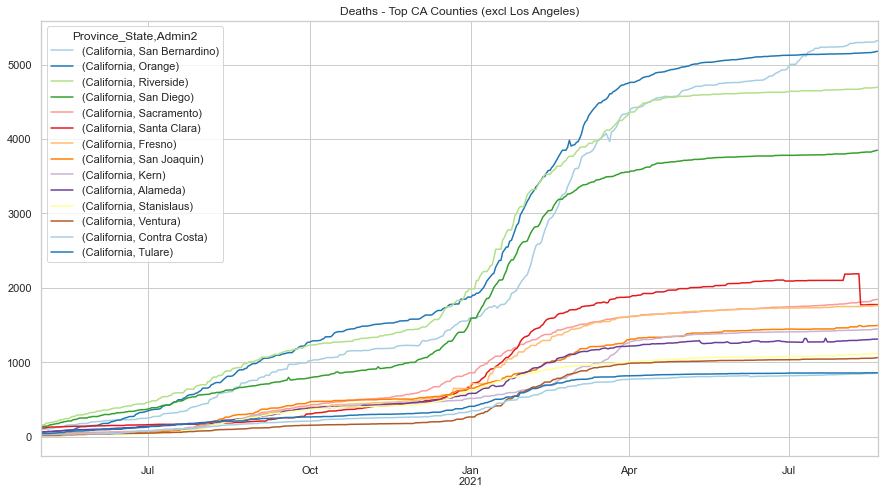

In [44]:
# Same chart but excluding Los Angeles to zoom in on the others
top_counties_CAexLA_deaths = top_counties_CA_deaths.loc[zoom_date4:, ('California', top_counties_CA_filter != 'Los Angeles')]
top_counties_CAexLA_deaths.plot(title='Deaths - Top CA Counties (excl Los Angeles)', figsize=(15,8))

### Which Countries / US States / US Counties are becoming hot spots, or conversely, cooling down?  
This section uses the daily percentage changes, smoothed by an exponentially weighted moving average to minimize daily outliers, while giving more weight to more recent data vs what a simple moving average would.  

#### Prominent Countries

For reference, start by showing the recent EWMA of daily % change for prominent countries (making headlines related to Covid-19)

In [45]:
prominent_countries_filter = ['US', 'China', 'Brazil', 'Russia', 'India']
prominent_countries = jh_hist_countries_cases_pct_ewma.loc[jh_hist_date, prominent_countries_filter]
prominent_countries

US        0.003865
China     0.000314
Brazil    0.001541
Russia    0.003097
India     0.000542
Name: 2021-08-21 00:00:00, dtype: float64

<AxesSubplot:>

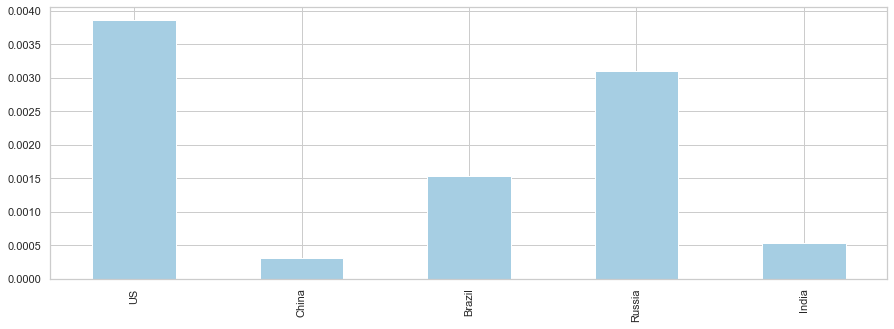

In [46]:
prominent_countries.plot(kind='bar', figsize=(15,5))

#### Hot Spots - Countries

*First, filter to only include countries with > 100,000 confirmed cases to exclude lesser affected countries*

In [47]:
countries_impacted_filter = jh_hist_countries_cases.loc[jh_hist_date]>100000
countries_impacted = jh_hist_countries_cases.loc[:, countries_impacted_filter].columns

<AxesSubplot:>

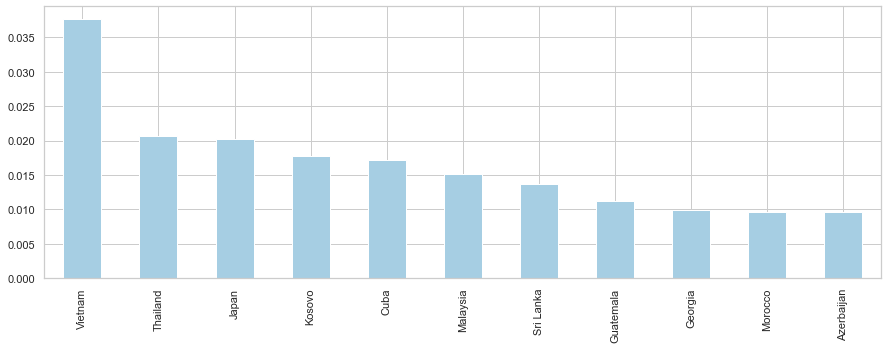

In [48]:
countries_hot_spots = jh_hist_countries_cases_pct_ewma.loc[jh_hist_date, countries_impacted].nlargest(11)
countries_hot_spots.plot(kind='bar', figsize=(15,5))

In [49]:
countries_hot_spots = countries_hot_spots.index.values

<AxesSubplot:title={'center':'Confirmed Cases - Country Hot Spots'}>

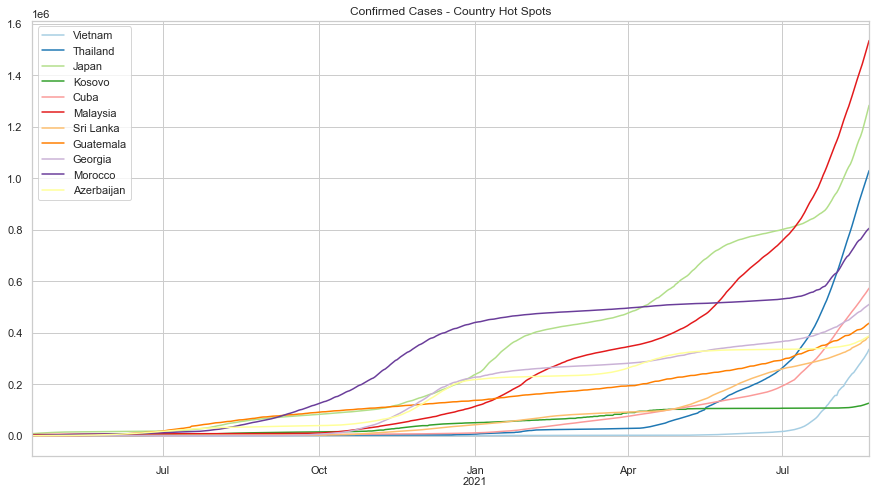

In [50]:
jh_hist_countries_cases.loc[zoom_date3:, countries_hot_spots].plot(title='Confirmed Cases - Country Hot Spots', figsize=(15,8))

**For comparison sake, include US**

In [51]:
countries_hot_spots = np.append(countries_hot_spots, 'US')

<AxesSubplot:title={'center':'Confirmed Cases - Country Hot Spots (with US)'}>

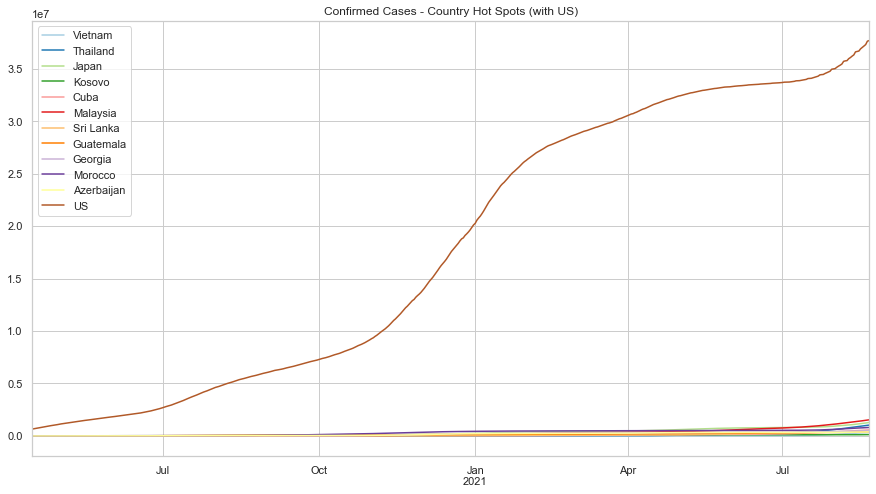

In [52]:
jh_hist_countries_cases.loc[zoom_date3:, countries_hot_spots].plot(title='Confirmed Cases - Country Hot Spots (with US)', figsize=(15,8))

#### Cooling Down - Countries

*Note: this uses the same impacted countries filter used above for the hot spots to exclude countries with very small total case counts*

In [53]:
countries_cooling_down = jh_hist_countries_cases_pct_ewma.loc[jh_hist_date, countries_impacted].nsmallest(12)
countries_cooling_down

Hungary        0.000033
Poland         0.000074
Czechia        0.000111
Oman           0.000153
Afghanistan    0.000215
Slovakia       0.000224
Paraguay       0.000304
China          0.000314
Peru           0.000325
Uruguay        0.000332
Ecuador        0.000345
Bahrain        0.000359
Name: 2021-08-21 00:00:00, dtype: float64

In [54]:
countries_cooling_down = countries_cooling_down.index.values

<AxesSubplot:title={'center':'Confirmed Cases - Countries Cooling Down'}>

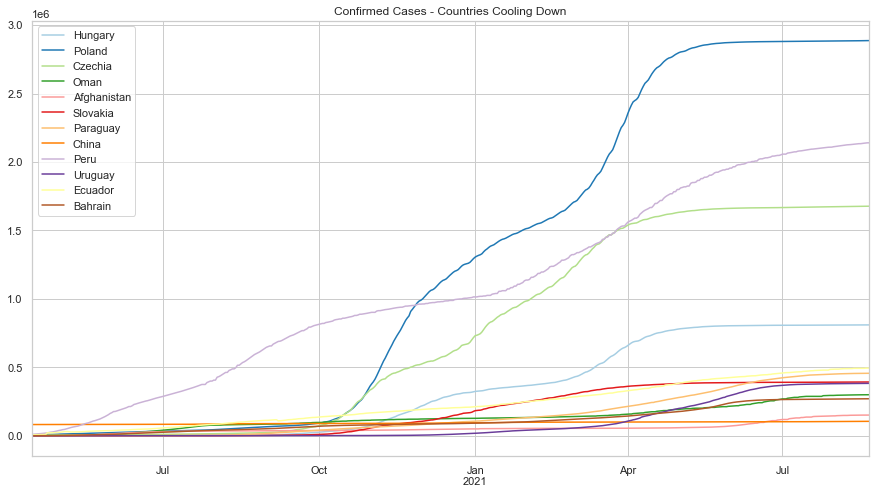

In [55]:
jh_hist_countries_cases.loc[zoom_date3:, countries_cooling_down].plot(title='Confirmed Cases - Countries Cooling Down', figsize=(15,8))

#### Hot Spots - US States

*First, filter out non-states from the data (Diamond princess, virgin islands, etc).  Use threshold of 500 cases which safely excludes non-states*

In [56]:
actual_states_filter = jh_hist_usstates_cases.loc[jh_hist_date] > 500
actual_states = jh_hist_usstates_cases.loc[jh_hist_date, actual_states_filter].index.values

In [57]:
usstates_hot_spots = jh_hist_usstates_cases_pct_ewma.loc[jh_hist_date, actual_states].nlargest(12)
usstates_hot_spots

Hawaii            0.014206
Florida           0.013010
Virgin Islands    0.011778
Alabama           0.007771
Puerto Rico       0.007003
Arkansas          0.006031
Mississippi       0.005947
Texas             0.005488
Vermont           0.005280
Oregon            0.004863
Louisiana         0.004606
Guam              0.004468
Name: 2021-08-21 00:00:00, dtype: float64

<AxesSubplot:>

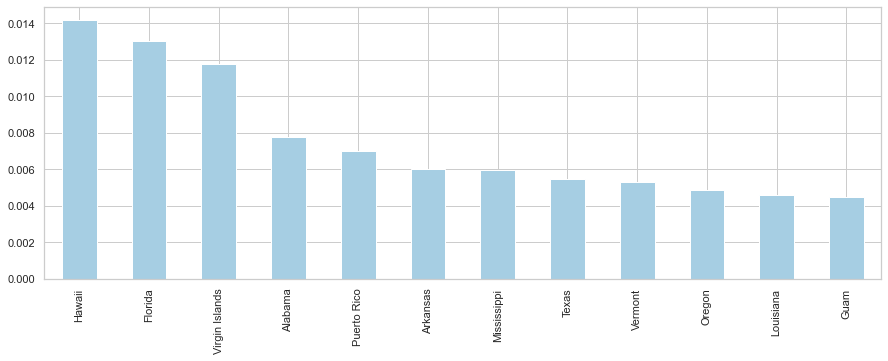

In [58]:
usstates_hot_spots.plot(kind='bar', figsize=(15,5))

In [59]:
usstates_hot_spots = usstates_hot_spots.index.values

<AxesSubplot:title={'center':'Confirmed Cases - US State Hot Spots'}>

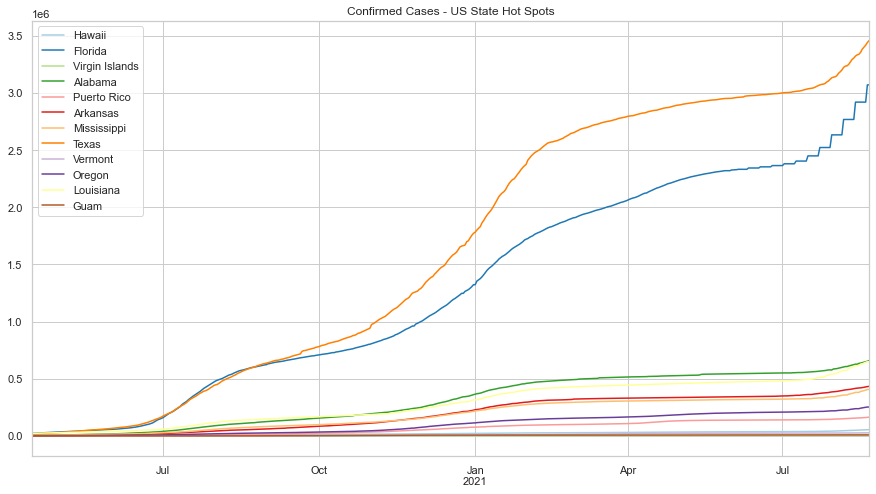

In [60]:
jh_hist_usstates_cases.loc[zoom_date3:, usstates_hot_spots].plot(title='Confirmed Cases - US State Hot Spots', figsize=(15,8))

#### Cooling Down - US States

In [61]:
usstates_cooling_down = jh_hist_usstates_cases_pct_ewma.loc[jh_hist_date, actual_states].nsmallest(10)
usstates_cooling_down

Connecticut      0.000730
Iowa             0.000926
Massachusetts    0.001051
Rhode Island     0.001124
South Dakota     0.001193
Minnesota        0.001250
Wisconsin        0.001261
Utah             0.001345
New Hampshire    0.001398
Colorado         0.001411
Name: 2021-08-21 00:00:00, dtype: float64

<AxesSubplot:>

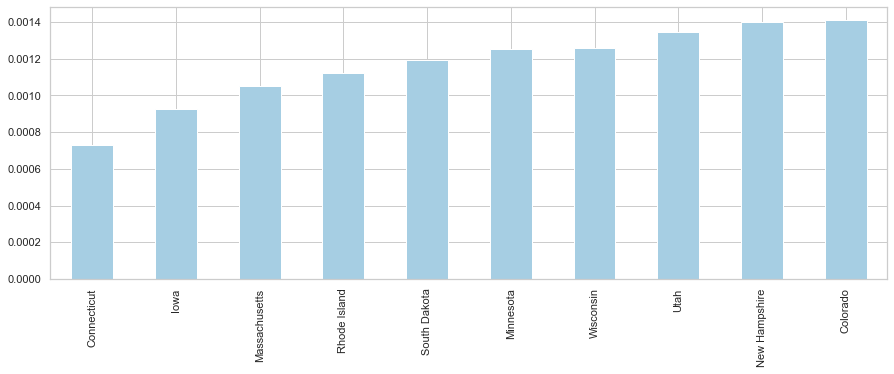

In [62]:
usstates_cooling_down.plot(kind='bar', figsize=(15,5))

In [63]:
usstates_cooling_down = usstates_cooling_down.index.values

<AxesSubplot:title={'center':'Confirmed Cases - US States Cooling Down'}>

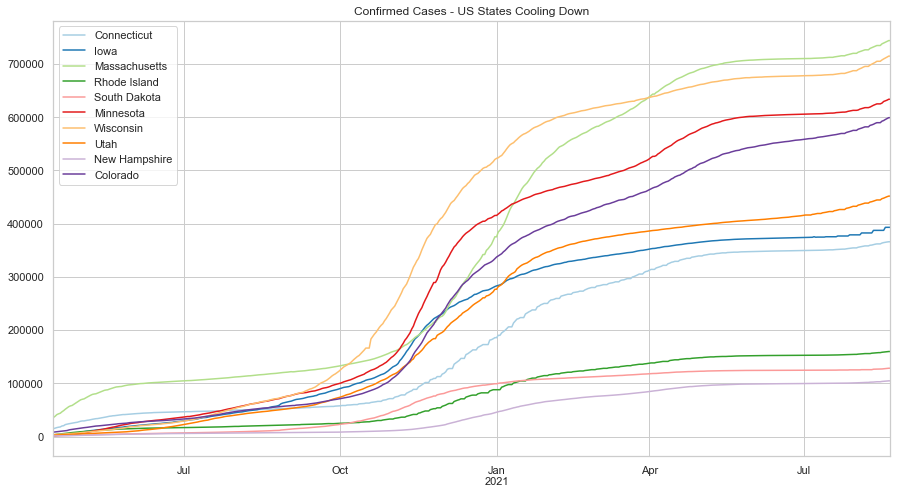

In [64]:
jh_hist_usstates_cases.loc[zoom_date3:, usstates_cooling_down].plot(title='Confirmed Cases - US States Cooling Down', figsize=(15,8))

#### Hot Spots - US Counties

`TODO - LOOK UP HOT SPOT COUNTIES WITHIN HOT SPOT STATES`

#### Cooling Down - US Counties

`TODO (POSSIBLY) - MAY NOT BE RELEVANT INFO SINCE THERE ARE A HUGE NUMBER OF COUNTIES WITH SMALL POPULATIONS`